# Generemos gráficas resúmenes - ENAHO 2010 al 2021

## Importamos nuestras librerías


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
mpl.style.use(['ggplot'])

## Leemos nuestro dataframe

In [ ]:
df_enaho_2010_2021 = pd.read_csv('/work/enaho-personas-estudios-caracteristicas-data-science/ENAHO_2010_2021.csv')
df_enaho_2010_2021

,anio,sup_uni_incompleta,sup_uni_completa,maestria_doctorado,pregrado_psicologia,hombres_pregrado_psicologia,mujeres_pregrado_psicologia,pregrado_derecho,pregrado_ing_civil,pregrado_contabilidad,pregrado_admin_empresas,pregrado_ing_sistemas
0,2010,3393.0,3109.0,606.0,67.0,20.0,47.0,213.0,137.0,287.0,244.0,155.0
1,2011,3964.0,3713.0,650.0,100.0,34.0,66.0,273.0,179.0,362.0,242.0,187.0
2,2012,4396.0,4132.0,809.0,106.0,35.0,71.0,276.0,233.0,442.0,316.0,170.0
3,2013,5345.0,5557.0,1060.0,144.0,30.0,114.0,313.0,323.0,488.0,372.0,233.0
4,2014,5616.0,5578.0,1179.0,146.0,40.0,106.0,338.0,360.0,543.0,416.0,221.0
5,2015,5431.0,5833.0,1020.0,169.0,40.0,129.0,301.0,359.0,440.0,345.0,191.0
6,2016,6344.0,6770.0,1239.0,218.0,52.0,166.0,445.0,451.0,555.0,351.0,223.0
7,2017,6035.0,6450.0,NaN,247.0,62.0,185.0,396.0,413.0,491.0,326.0,199.0
8,2018,6401.0,7028.0,1441.0,260.0,77.0,183.0,423.0,413.0,498.0,334.0,218.0
9,2019,5853.0,6685.0,1404.0,260.0,75.0,185.0,401.0,404.0,398.0,311.0,168.0


## Los valores nulos los completamos con 'ceros = 0'

In [ ]:
df_enaho_2010_2021.fillna(0, inplace = True)
df_enaho_2010_2021

,anio,sup_uni_incompleta,sup_uni_completa,maestria_doctorado,pregrado_psicologia,hombres_pregrado_psicologia,mujeres_pregrado_psicologia,pregrado_derecho,pregrado_ing_civil,pregrado_contabilidad,pregrado_admin_empresas,pregrado_ing_sistemas
0,2010,3393.0,3109.0,606.0,67.0,20.0,47.0,213.0,137.0,287.0,244.0,155.0
1,2011,3964.0,3713.0,650.0,100.0,34.0,66.0,273.0,179.0,362.0,242.0,187.0
2,2012,4396.0,4132.0,809.0,106.0,35.0,71.0,276.0,233.0,442.0,316.0,170.0
3,2013,5345.0,5557.0,1060.0,144.0,30.0,114.0,313.0,323.0,488.0,372.0,233.0
4,2014,5616.0,5578.0,1179.0,146.0,40.0,106.0,338.0,360.0,543.0,416.0,221.0
5,2015,5431.0,5833.0,1020.0,169.0,40.0,129.0,301.0,359.0,440.0,345.0,191.0
6,2016,6344.0,6770.0,1239.0,218.0,52.0,166.0,445.0,451.0,555.0,351.0,223.0
7,2017,6035.0,6450.0,0.0,247.0,62.0,185.0,396.0,413.0,491.0,326.0,199.0
8,2018,6401.0,7028.0,1441.0,260.0,77.0,183.0,423.0,413.0,498.0,334.0,218.0
9,2019,5853.0,6685.0,1404.0,260.0,75.0,185.0,401.0,404.0,398.0,311.0,168.0


# Empezamos a graficar

> Colocamos nuestros 'anio' como index para hacer gráficos personalizados

In [ ]:
path_img_safe = '/work/enaho-personas-estudios-caracteristicas-data-science/GRAFICOS_ENAHO_2010_2021/'

In [ ]:
df_enaho_2010_2021.set_index('anio', inplace = True)

In [ ]:
df_enaho_2010_2021

,sup_uni_incompleta,sup_uni_completa,maestria_doctorado,pregrado_psicologia,hombres_pregrado_psicologia,mujeres_pregrado_psicologia,pregrado_derecho,pregrado_ing_civil,pregrado_contabilidad,pregrado_admin_empresas,pregrado_ing_sistemas
anio,,,,,,,,,,,
2010,3393.0,3109.0,606.0,67.0,20.0,47.0,213.0,137.0,287.0,244.0,155.0
2011,3964.0,3713.0,650.0,100.0,34.0,66.0,273.0,179.0,362.0,242.0,187.0
2012,4396.0,4132.0,809.0,106.0,35.0,71.0,276.0,233.0,442.0,316.0,170.0
2013,5345.0,5557.0,1060.0,144.0,30.0,114.0,313.0,323.0,488.0,372.0,233.0
2014,5616.0,5578.0,1179.0,146.0,40.0,106.0,338.0,360.0,543.0,416.0,221.0
2015,5431.0,5833.0,1020.0,169.0,40.0,129.0,301.0,359.0,440.0,345.0,191.0
2016,6344.0,6770.0,1239.0,218.0,52.0,166.0,445.0,451.0,555.0,351.0,223.0
2017,6035.0,6450.0,0.0,247.0,62.0,185.0,396.0,413.0,491.0,326.0,199.0
2018,6401.0,7028.0,1441.0,260.0,77.0,183.0,423.0,413.0,498.0,334.0,218.0


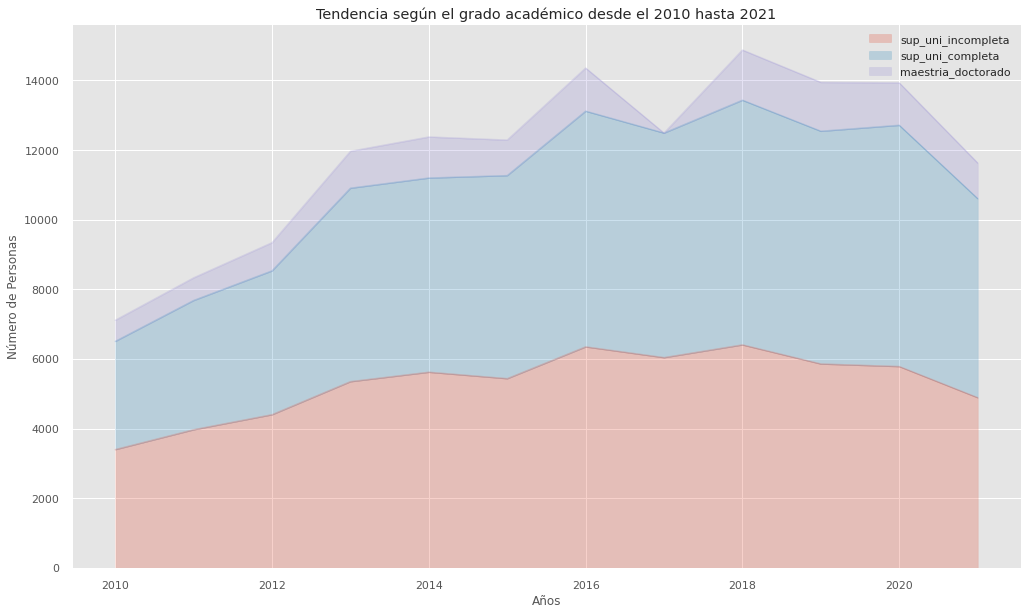

In [ ]:
df_grado_acade = df_enaho_2010_2021[['sup_uni_incompleta', 'sup_uni_completa', 'maestria_doctorado']]


df_grado_acade.index = df_grado_acade.index.map(int)
df_grado_acade.plot(kind='area',
            alpha = 0.25,
            stacked=True,
            figsize=(17, 10))

plt.title('Tendencia según el grado académico desde el 2010 hasta 2021')
plt.ylabel('Número de Personas')
plt.xlabel('Años')
plt.savefig(path_img_safe + 'grado_acade_area.png')
plt.show()

In [ ]:
df_pregrado_psicologia = df_enaho_2010_2021['pregrado_psicologia']
df_pregrado_psicologia.head()

anio
2010     67.0
2011    100.0
2012    106.0
2013    144.0
2014    146.0
Name: pregrado_psicologia, dtype: float64

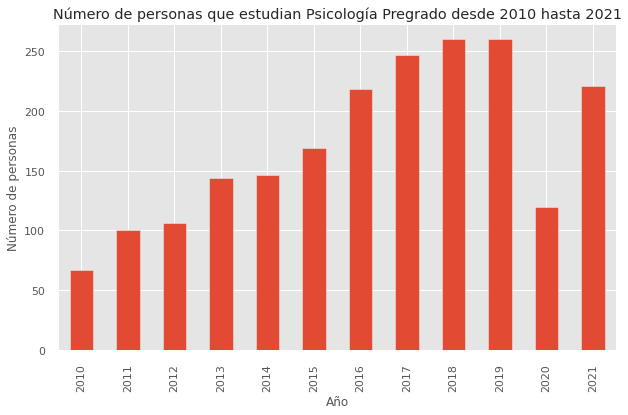

In [ ]:
df_pregrado_psicologia.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Año')
plt.ylabel('Número de personas')
plt.title('Número de personas que estudian Psicología Pregrado desde 2010 hasta 2021')
plt.savefig(path_img_safe + 'pregrado_psicologia_personas.png')
plt.show()

In [ ]:
df_enaho_2010_2021.columns

Index(['sup_uni_incompleta', 'sup_uni_completa', 'maestria_doctorado',
       'pregrado_psicologia', 'hombres_pregrado_psicologia',
       'mujeres_pregrado_psicologia', 'pregrado_derecho', 'pregrado_ing_civil',
       'pregrado_contabilidad', 'pregrado_admin_empresas',
       'pregrado_ing_sistemas'],
      dtype='object')

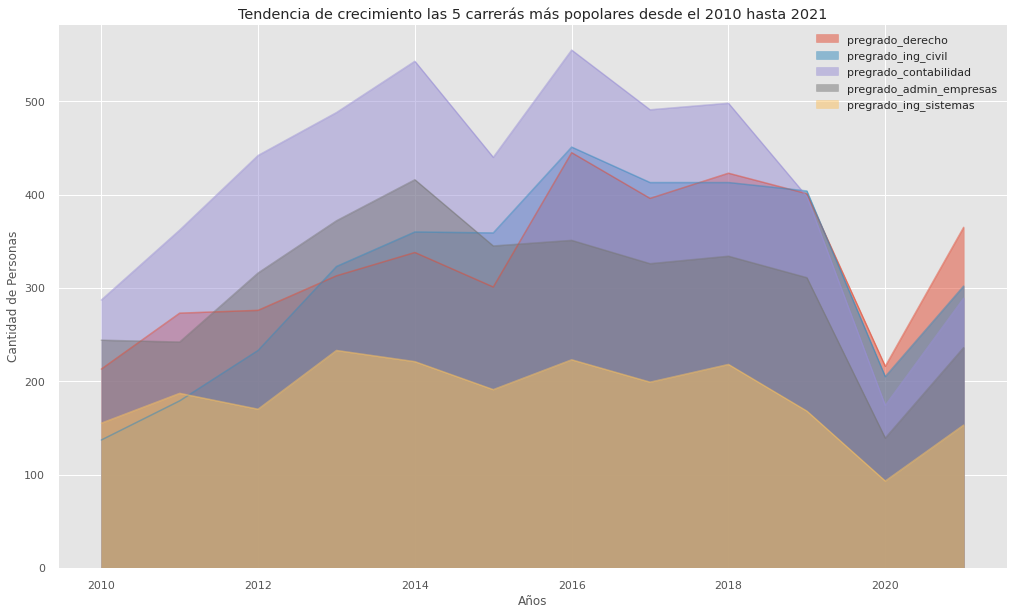

In [ ]:
df_pregrado_carr_uni = df_enaho_2010_2021[['pregrado_derecho', 'pregrado_ing_civil', 'pregrado_contabilidad', 'pregrado_admin_empresas', 'pregrado_ing_sistemas']]

df_pregrado_carr_uni.index = df_pregrado_carr_uni.index.map(int)
df_pregrado_carr_uni.plot(kind='area', stacked=False,
            figsize=(17, 10))

plt.title('Tendencia de crecimiento las 5 carrerás más popolares desde el 2010 hasta 2021')
plt.ylabel('Cantidad de Personas')
plt.xlabel('Años')
plt.savefig(path_img_safe + 'carr_uni_pregrado_area.png')
plt.show()

In [ ]:
df_hombres_mujers_pregrado_psicologia = df_enaho_2010_2021[['hombres_pregrado_psicologia', 'mujeres_pregrado_psicologia']]
df_hombres_mujers_pregrado_psicologia.head()

,hombres_pregrado_psicologia,mujeres_pregrado_psicologia
anio,,
2010,20.0,47.0
2011,34.0,66.0
2012,35.0,71.0
2013,30.0,114.0
2014,40.0,106.0


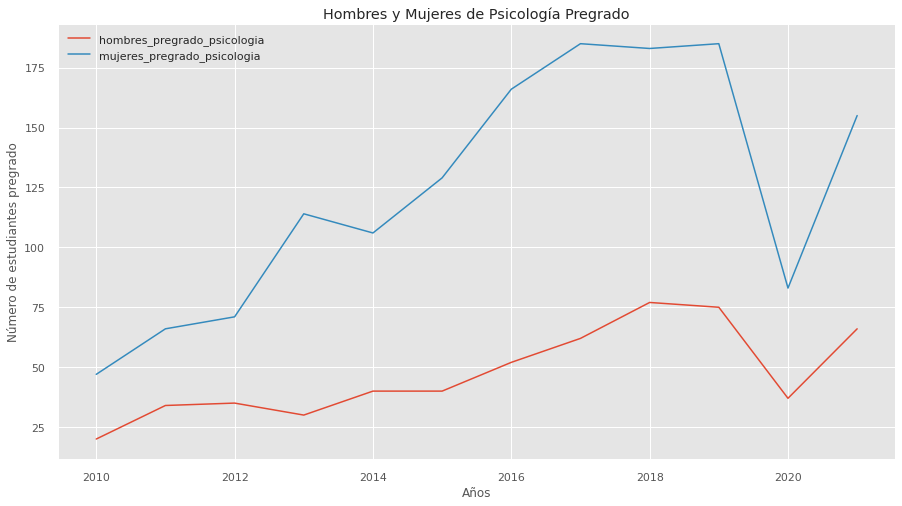

In [ ]:
### type your answer here
df_hombres_mujers_pregrado_psicologia.index = df_hombres_mujers_pregrado_psicologia.index.map(int)

df_hombres_mujers_pregrado_psicologia.plot(kind = 'line', figsize=(15, 8))
plt.title('Hombres y Mujeres de Psicología Pregrado')
plt.xlabel('Años')
plt.ylabel('Número de estudiantes pregrado')
plt.savefig(path_img_safe + 'hom_muj_pregrado_psicologia_line.png')
plt.show()

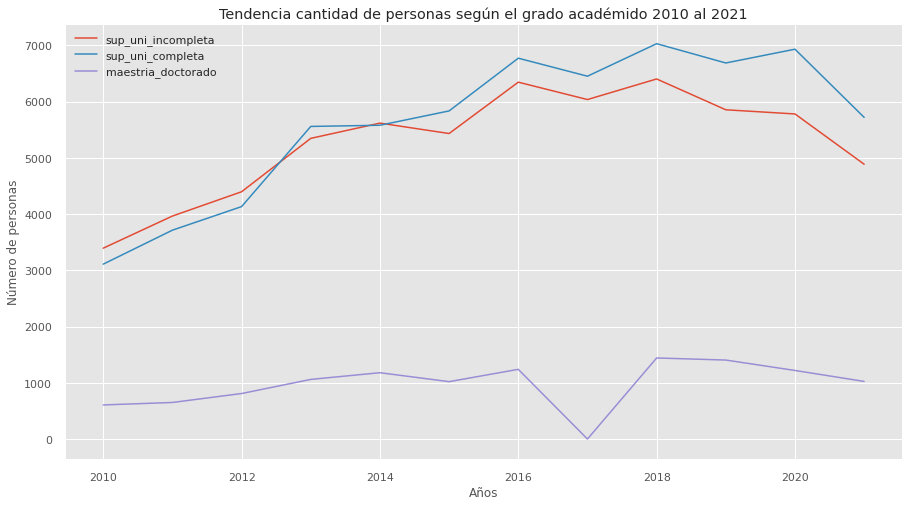

In [ ]:
df_grado_acade = df_enaho_2010_2021[['sup_uni_incompleta', 'sup_uni_completa', 'maestria_doctorado']]


df_grado_acade.plot(kind = 'line', figsize=(15, 8))
plt.title('Tendencia cantidad de personas según el grado académido 2010 al 2021')
plt.xlabel('Años')
plt.ylabel('Número de personas')
plt.savefig(path_img_safe + 'num_personas_grado_acade_line.png')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=61180446-cfea-4338-ac0e-81e50a732b69' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>